#Datos generales

In [ ]:
Actividad Semanal - 4

Estefania Abigail Castro Belmont A01332636
Vladimir Salazar Altamirano A01793118

Ciencia y analítica de datos

Jobish

11/10/2022

#Parte 1: Ejercicio guiado 

##Paso 1

Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

###Importando datos del ejercicio anterior

In [1]:
#importamos librerías
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing

In [2]:
#leemos el ejercicio que realizamos la útlima ocasión
#Como la última ocasión ya habíamos realizado preprocesamiento de la base de datos
#Tomamos el archivo limpio, donde hicimos ya algunas eliminaciones y completamos los datos faltantes
#Para no repetir el código que ya se había empleado en el ejercicio anterior
df= pd.read_csv("C:/Users/vlada/Documents/DATA4/datoslimpios_default_of_credit_card_clients.csv")

In [3]:
#Aquí desplegamos el dataframe con las primeras cinco filas para visualizar datos.
#Se observa que la última columna es la "Y".
df.head()

,Unnamed: 0,ID,X1,X2,X3,X4,X5,X6,X7,X8,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [4]:
#Eliminamos las dos columnas que tienen doble índide
df = df.iloc[:,2:]
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [25]:
#Eliminamos la columna con el objetivo (target)
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [28]:
#Vemos la dimensión de nuestro DataFrame
X.shape

(29991, 23)

In [26]:
#Ahora vamos a estandarizar los datos empleando StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X =scaler.fit_transform(X)
X[:3,:]  #Aqui los datos ya estan normalizados es decir tienen media 0 y varianza 1

array([[-1.13687104,  0.80991045,  0.18592555, -1.05748985, -1.24578851,
         1.79477973,  1.78238254, -0.69691676, -0.66652586, -1.5300388 ,
        -1.48601774, -0.64258513, -0.64745625, -0.66804466, -0.67254498,
        -0.66311315, -0.65279714, -0.3418879 , -0.22711154, -0.29677535,
        -0.30807438, -0.31414014, -0.29342018],
       [-0.3660809 ,  0.80991045,  0.18592555,  0.85837206, -1.02881415,
        -0.87504562,  1.78238254,  0.13929971,  0.18887134,  0.23506462,
         1.9923946 , -0.65930112, -0.66680147, -0.63930877, -0.62168928,
        -0.60628931, -0.59804517, -0.3418879 , -0.2136155 , -0.23998431,
        -0.24425003, -0.31414014, -0.18093199],
       [-0.59731794,  0.80991045,  0.18592555,  0.85837206, -0.16091669,
         0.01489616,  0.11171748,  0.13929971,  0.18887134,  0.23506462,
         0.25318843, -0.29867849, -0.49397291, -0.48247973, -0.44980261,
        -0.41726574, -0.39173049, -0.25024419, -0.19191767, -0.23998431,
        -0.24425003, -0.2486

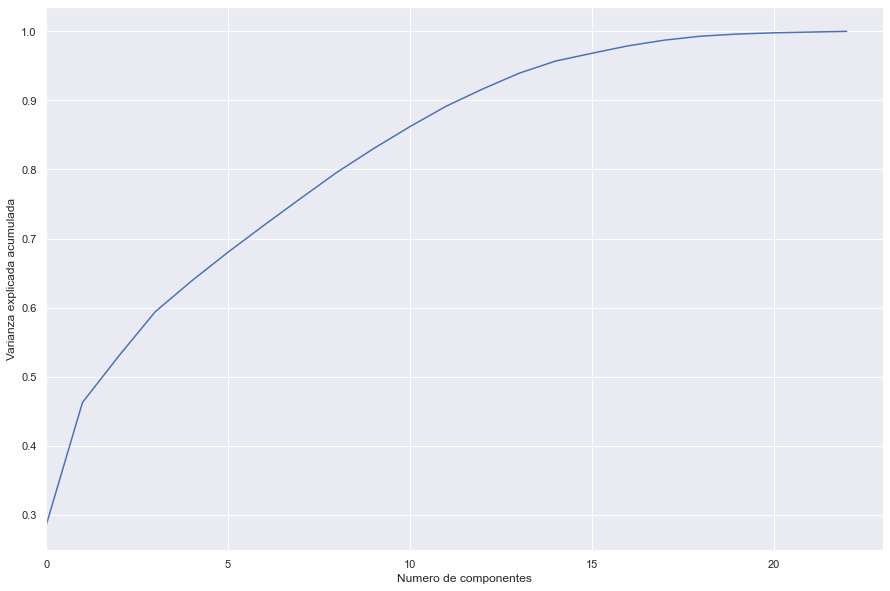

In [29]:
#Vamos a calcular la varianza explicada acumulada, por cada una de las componentes
from sklearn.decomposition import PCA

pca = PCA().fit(np.array(X)) #Entrenamos nuestro algoritmo de PCA con los datos estandarizados
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,23,1)
plt.xlabel('Numero de componentes')
plt.ylabel("Varianza explicada acumulada")
plt.show()

In [33]:
#Elegimos doce componentes, ya que ayudan a explicar alrededor del 90% de la varianza explicada acumulada

sklearn_pca = PCA(n_components = 12) #entrenamos un PCA con solo doce componentes principales

X_pca = sklearn_pca.fit_transform(X) #X_pca, seran los datos transformados una vez aplicada nuestra técnica de PCA
pd.DataFrame(X_pca).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.888045,-0.906449,-0.488476,-0.537671,0.995157,0.045843,-0.624855,0.113614,-0.190279,-0.083144,0.238348,3.264243
1,-0.765004,-2.109712,1.096750,-0.483433,0.859412,-0.234261,0.064132,0.093243,-0.153939,0.123477,0.143952,-0.881241
2,-0.847609,-1.072572,0.411411,-0.432942,0.770327,0.019929,-0.150960,-0.091845,-0.156614,0.089051,0.047367,-0.272807
3,-0.196777,-0.809485,-0.818621,0.294877,0.909410,-0.283692,0.234314,-0.062745,0.114570,-0.067007,0.021074,0.039889
4,-0.841130,-0.072498,-1.003052,2.328771,-1.025939,0.792844,0.713450,0.124082,0.603720,-0.307226,1.035679,-0.608302


Paso 2: Interprete cada componente principal en términos de las variables originales

            Examine la magnitud y la dirección de los coeficientes de las variables originales.

            Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente 
            #en el cálculo del componente.

In [35]:
#Examinamos la magnitud y la dirección de los coeficientes de las variables originales.
#Aquí se muestra el valor de cada una de las componentes.
print(sklearn_pca.components_)

[[ 6.85678191e-02 -2.17013136e-02  1.92222067e-02 -5.63585477e-03
   1.42420217e-02  1.61073303e-01  1.94096601e-01  2.00222110e-01
   2.07030282e-01  2.10878343e-01  2.06348541e-01  3.34401442e-01
   3.45814145e-01  3.49791563e-01  3.53897974e-01  3.51754837e-01
   3.44525462e-01  9.42472597e-02  7.86822948e-02  8.64106168e-02
   7.78026855e-02  7.53668038e-02  6.99493562e-02]
 [ 3.16376444e-01  3.05325899e-02 -9.16053012e-02 -4.32784988e-02
   6.66179750e-02 -2.98166308e-01 -3.34893420e-01 -3.43790475e-01
  -3.44581396e-01 -3.31615709e-01 -3.05799380e-01  1.39761783e-01
   1.40171841e-01  1.46168201e-01  1.45399939e-01  1.43738835e-01
   1.41829642e-01  1.49140704e-01  1.39880144e-01  1.51566190e-01
   1.41409848e-01  1.37177699e-01  1.29396704e-01]
 [ 1.75163476e-02  2.37206124e-02 -3.16035007e-01  4.52719924e-01
  -4.61986779e-01 -1.74174518e-02  1.78645910e-02  6.16081670e-02
   8.90450104e-02  1.08882589e-01  1.11069602e-01 -1.51048326e-01
  -1.27182546e-01 -8.40024603e-02 -7.059

In [37]:
#Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.
#Cuánto contribuye cada variuable a cada componente.
pd.DataFrame(sklearn_pca.components_, columns = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22']).head(12)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22
0,0.068568,-0.021701,0.019222,-0.005636,0.014242,0.161073,0.194097,0.200222,0.207030,0.210878,...,0.349792,0.353898,0.351755,0.344525,0.094247,0.078682,0.086411,0.077803,0.075367,0.069949
1,0.316376,0.030533,-0.091605,-0.043278,0.066618,-0.298166,-0.334893,-0.343790,-0.344581,-0.331616,...,0.146168,0.145400,0.143739,0.141830,0.149141,0.139880,0.151566,0.141410,0.137178,0.129397
2,0.017516,0.023721,-0.316035,0.452720,-0.461987,-0.017417,0.017865,0.061608,0.089045,0.108883,...,-0.084002,-0.070600,-0.056646,-0.047656,0.282267,0.302113,0.280569,0.237644,0.194439,0.209447
3,0.069755,-0.077583,0.247174,-0.445072,0.463101,0.016096,0.049975,0.083931,0.109310,0.115508,...,-0.104681,-0.100542,-0.088713,-0.084011,0.279963,0.310827,0.277949,0.236310,0.175909,0.207097
4,-0.148852,0.884672,0.363600,-0.053517,-0.164183,-0.035031,-0.037481,-0.023413,-0.007549,0.002004,...,0.029863,0.022665,0.022428,0.010536,0.092708,0.107403,0.036006,0.013518,-0.056880,-0.052109
5,-0.375796,-0.394182,0.566103,0.279753,-0.088848,-0.039954,-0.061053,-0.069887,-0.087350,-0.087041,...,0.085416,0.064152,0.024993,-0.021382,0.238453,0.255984,0.142859,-0.060429,-0.252740,-0.191950
6,0.105891,0.063957,-0.399647,-0.159598,0.081466,-0.086547,-0.092022,-0.021371,0.039362,0.103911,...,-0.003315,0.065914,0.080188,-0.049637,0.202722,0.104293,0.227270,0.024280,-0.701996,-0.360614
7,-0.059377,-0.027472,0.080913,0.026305,-0.012845,0.021485,0.015676,-0.026402,-0.056225,-0.034001,...,-0.125860,-0.036847,0.113064,0.163377,-0.267043,-0.218885,0.230136,0.646332,0.197513,-0.537123
8,0.021608,0.018656,-0.154996,-0.055952,0.046848,-0.030394,-0.033347,-0.011515,0.044363,0.054442,...,0.079769,0.026658,-0.069488,0.080658,0.036405,0.393706,-0.033865,-0.445972,0.474870,-0.596817
9,0.017463,0.024381,0.062528,0.038576,0.008067,0.003288,0.006545,-0.024857,-0.056841,0.066777,...,-0.122215,0.123545,-0.005543,0.013789,-0.236347,-0.278725,0.784838,-0.435357,0.056335,0.104561


Paso 3: Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.


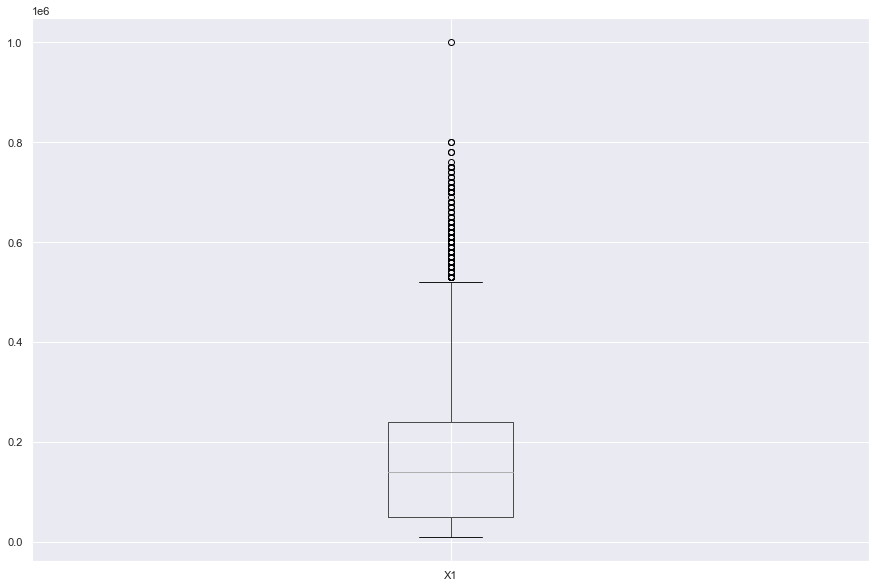

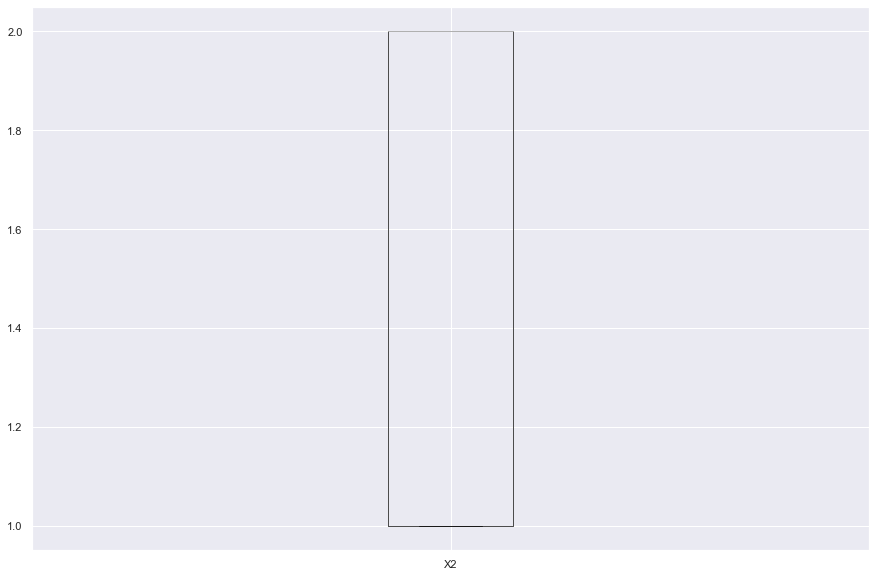

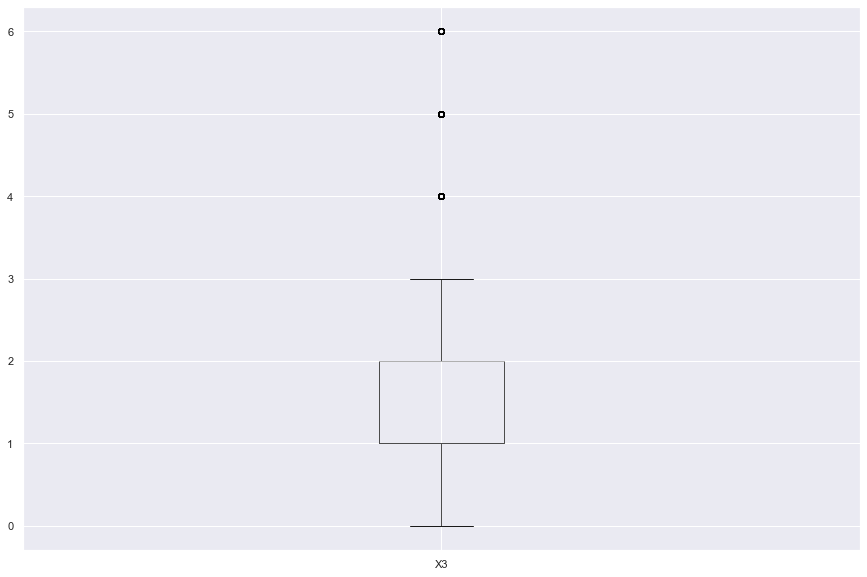

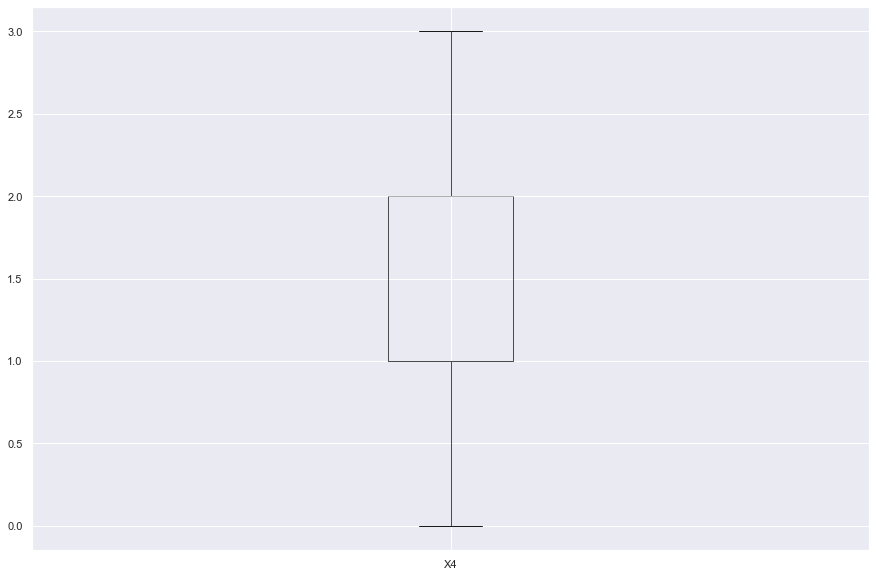

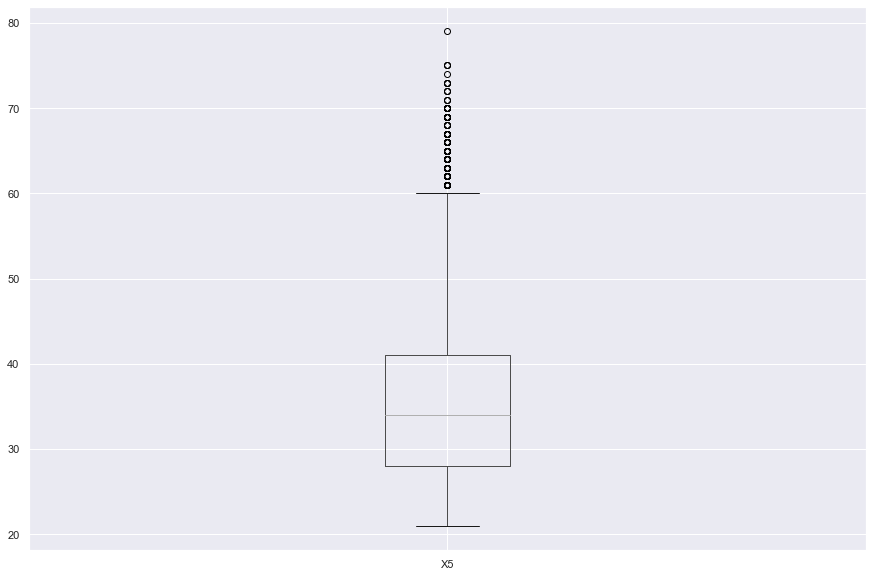

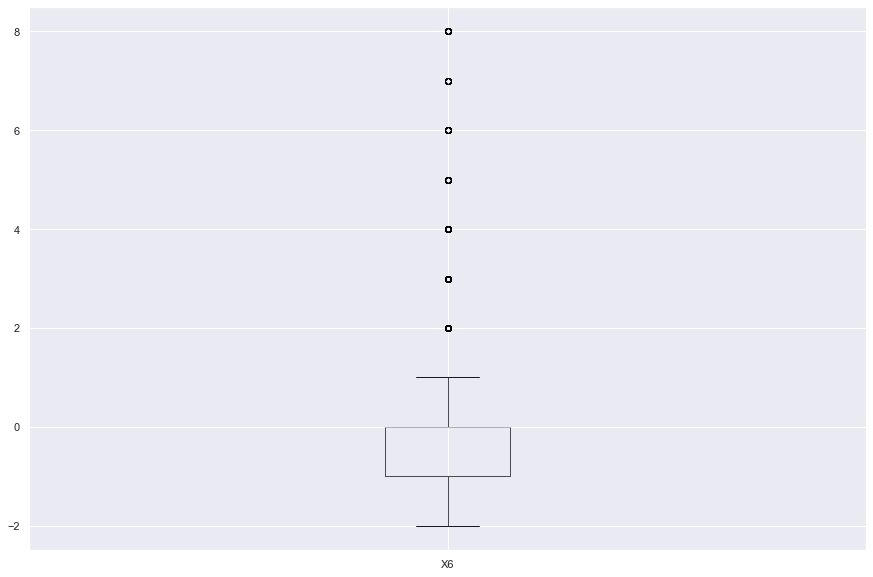

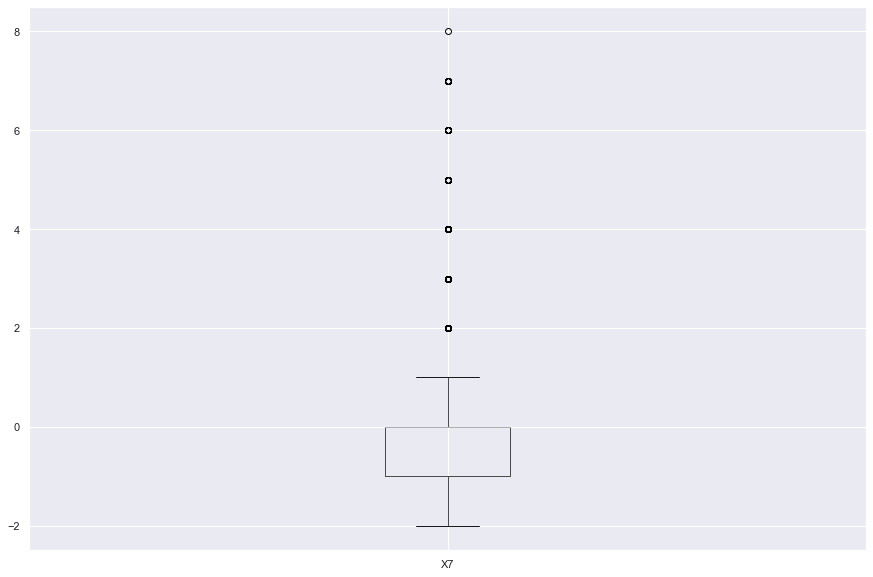

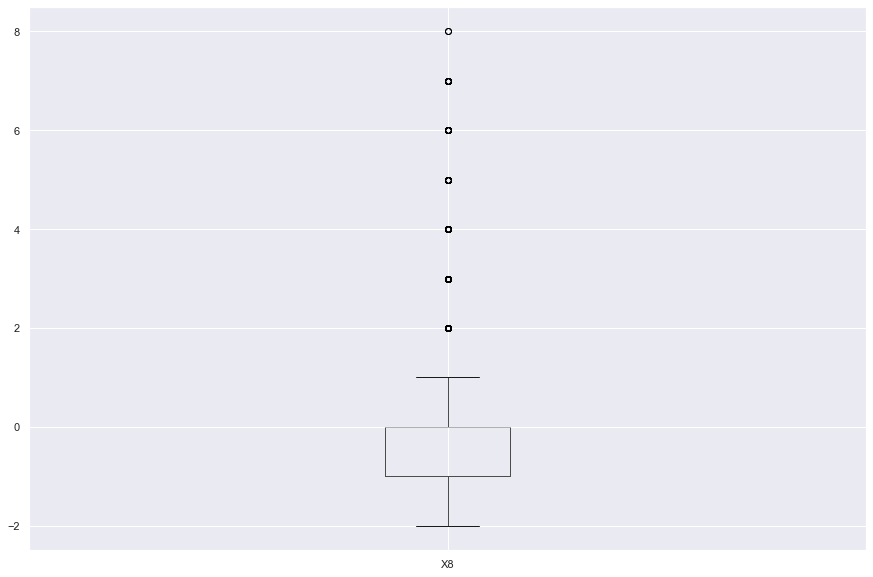

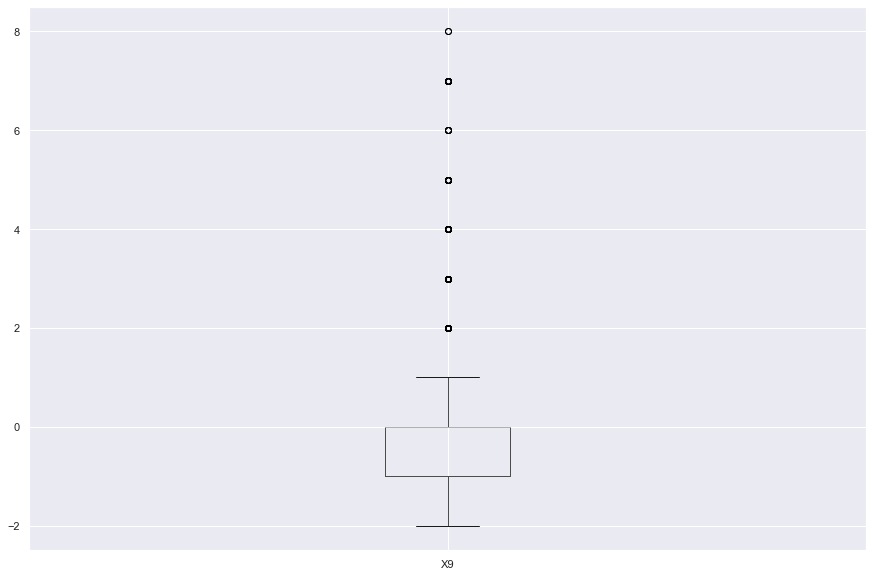

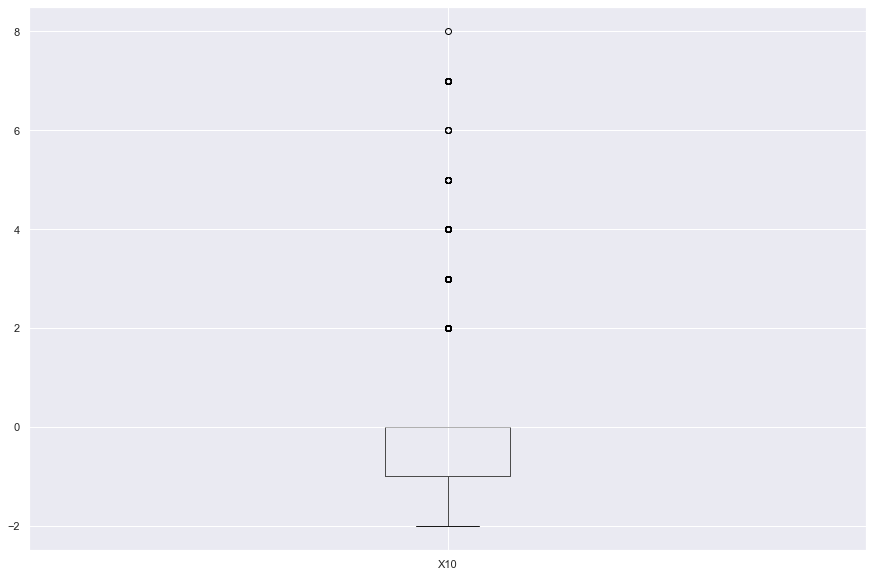

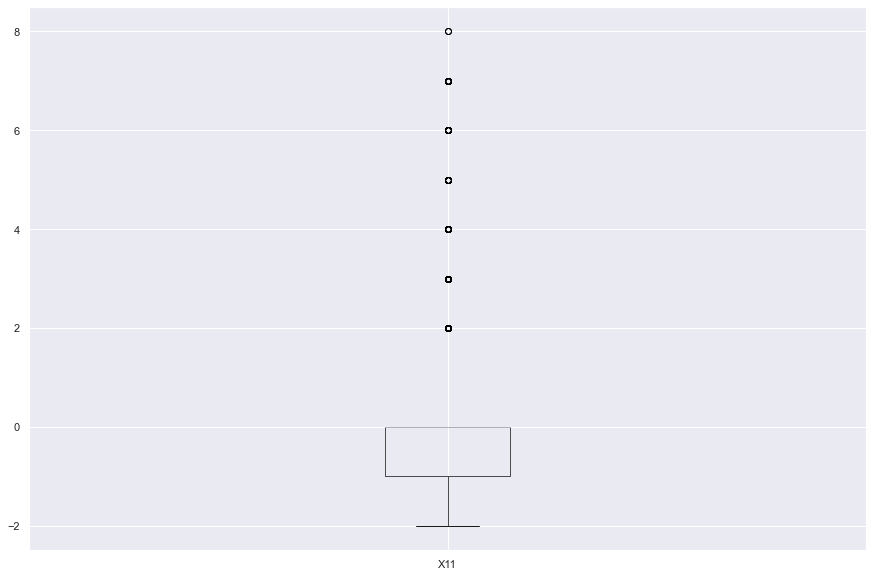

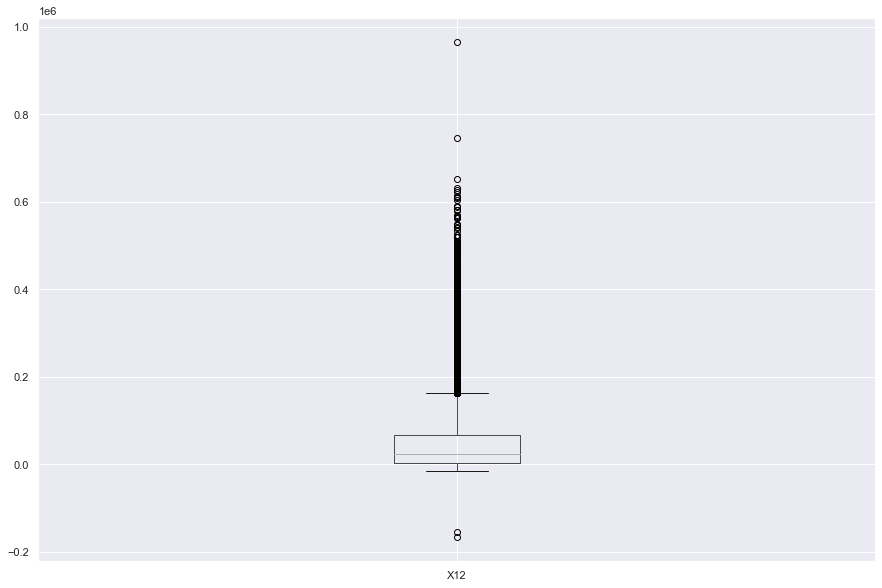

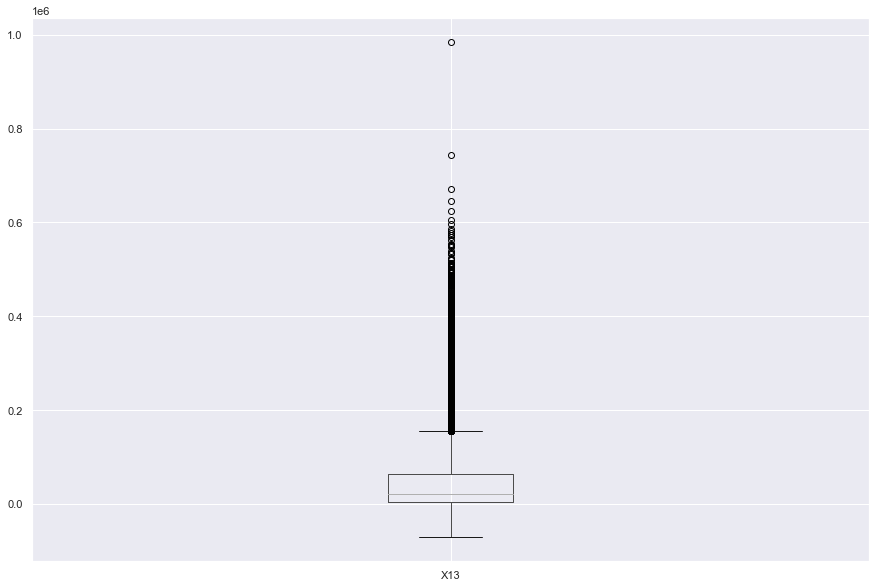

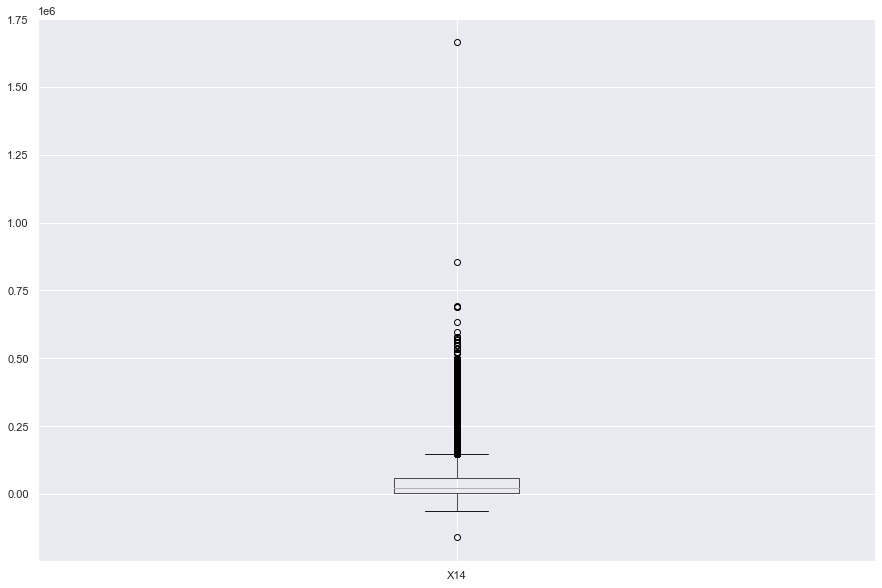

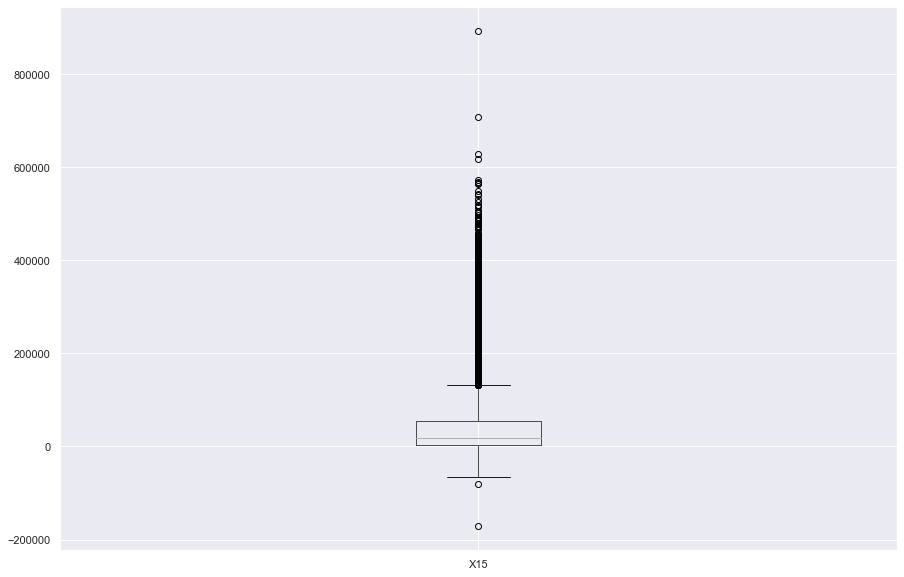

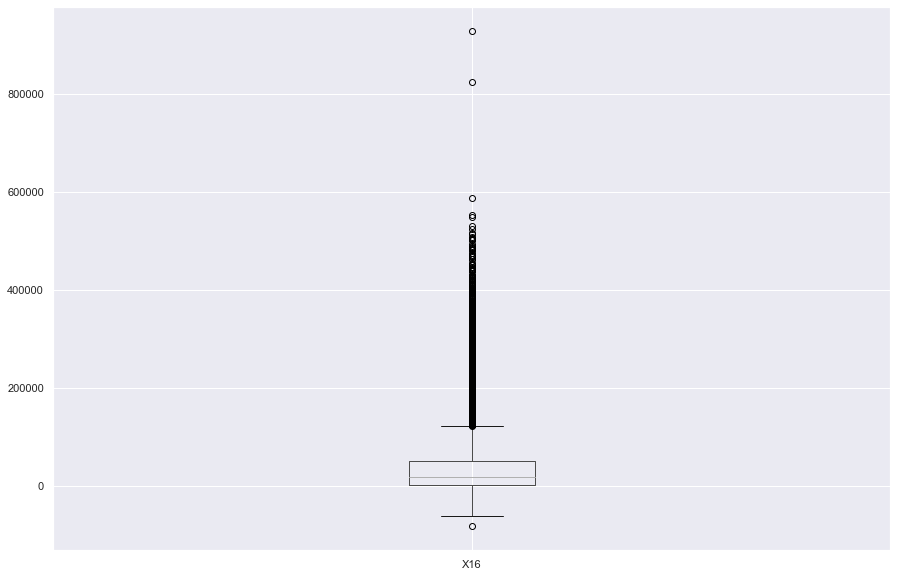

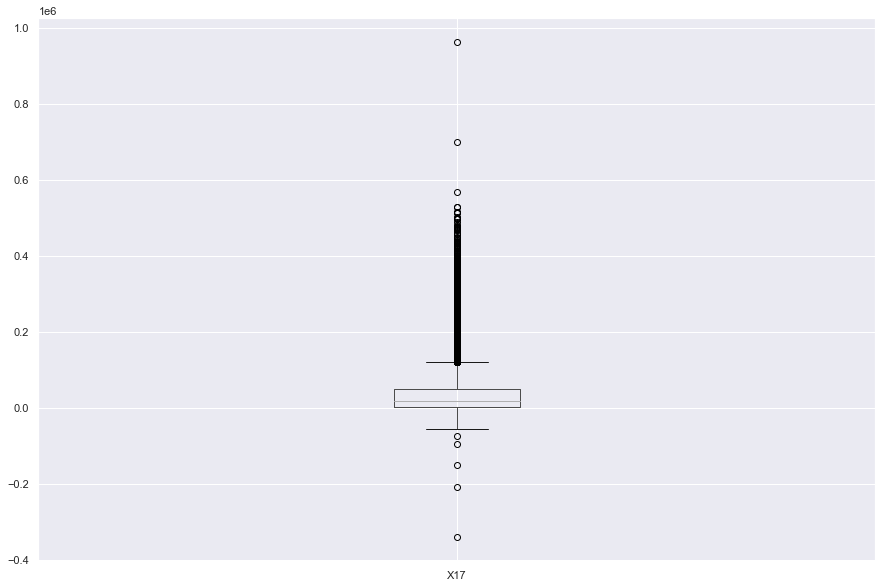

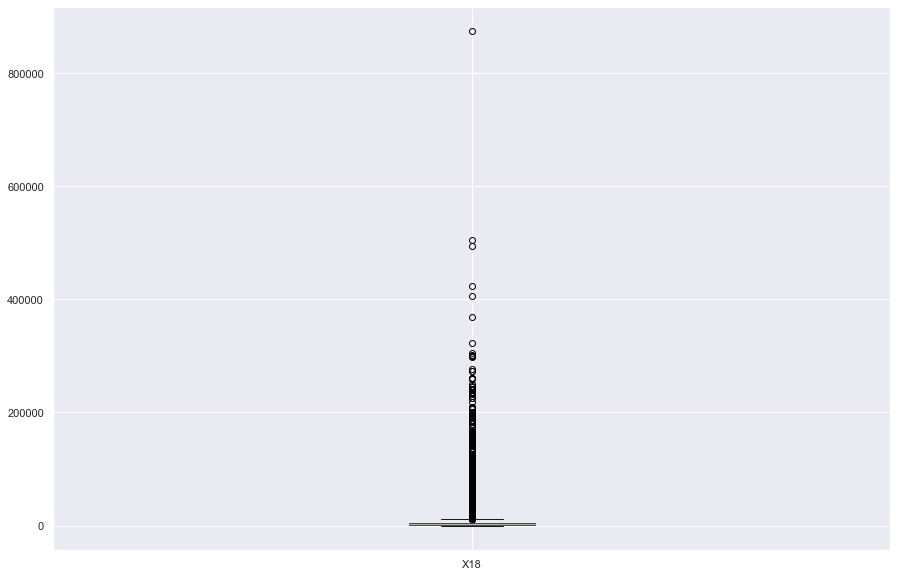

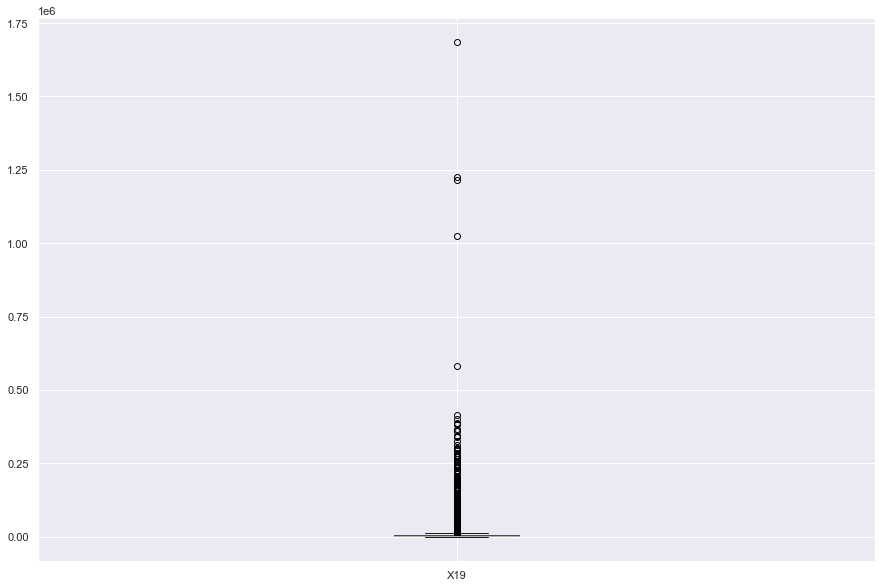

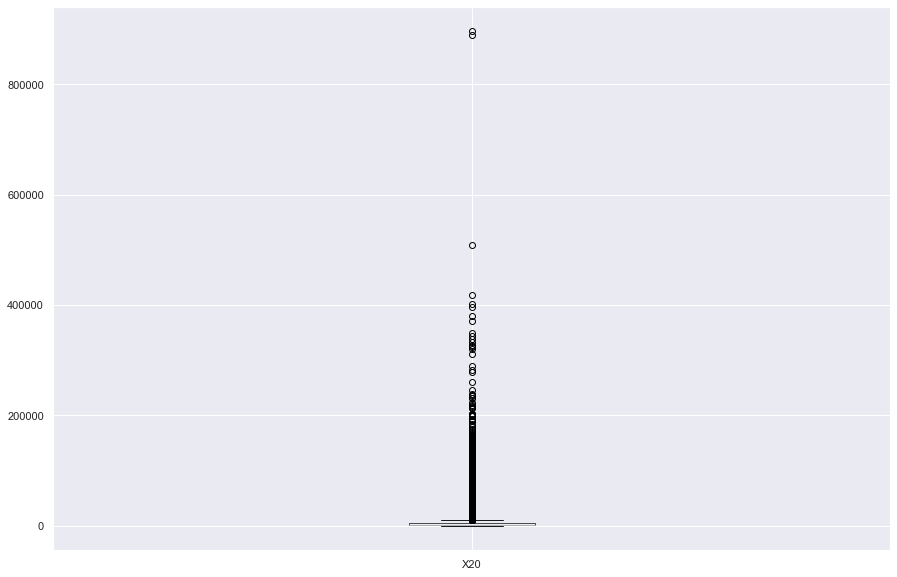

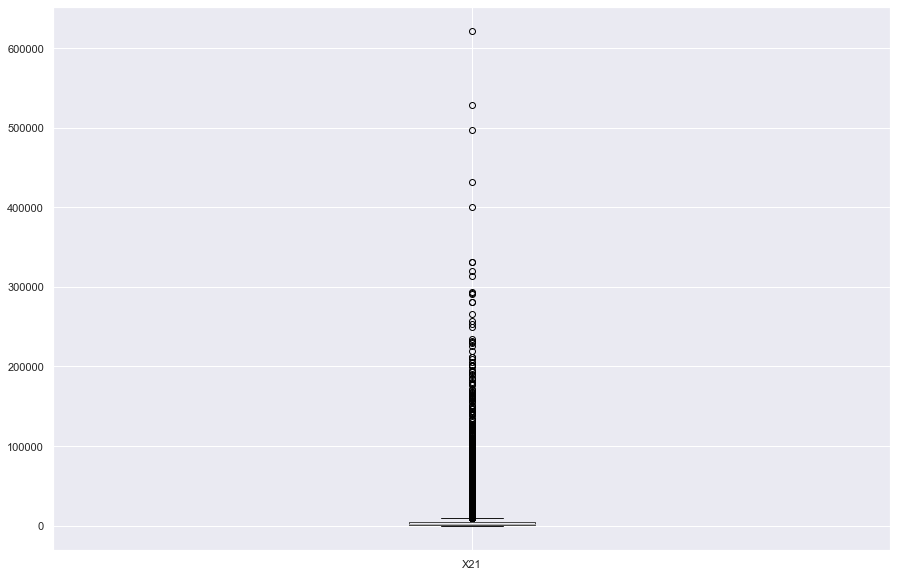

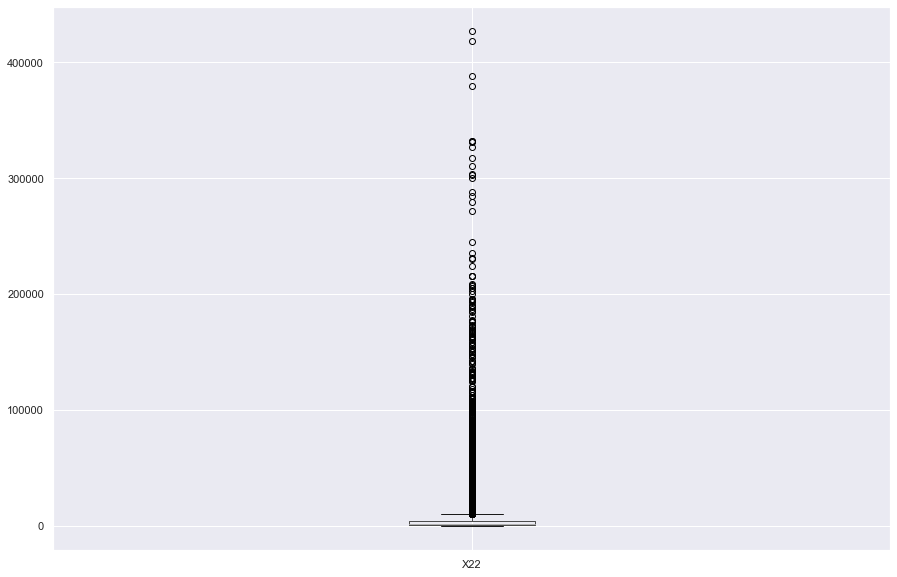

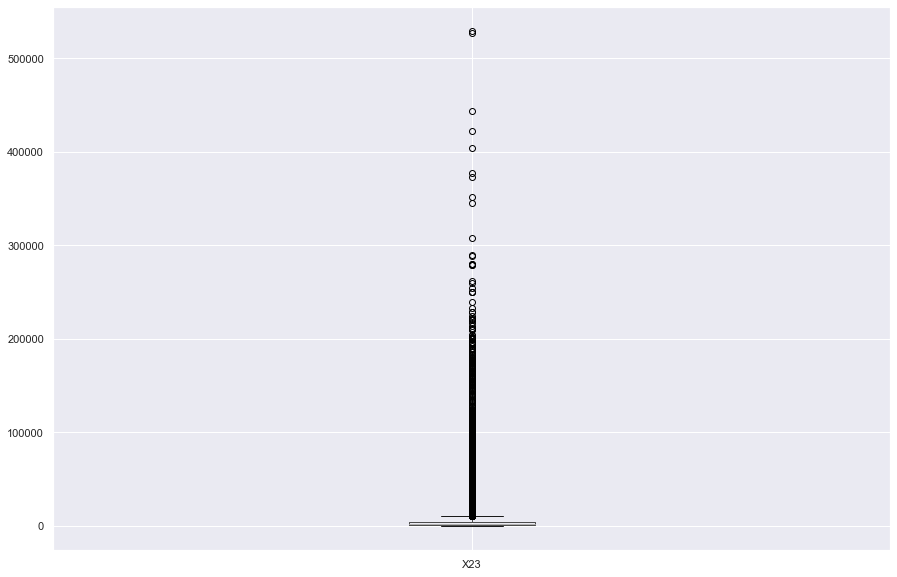

In [43]:
# Se van a identificar los datos atípicos de las variables originales (escala real)
#Se identifican datos atípicos de las columnas con datos numéricos.
for col in df.columns:
    if col != "Y": 
        boxplot = df.boxplot(column = col) 
        plt.show()

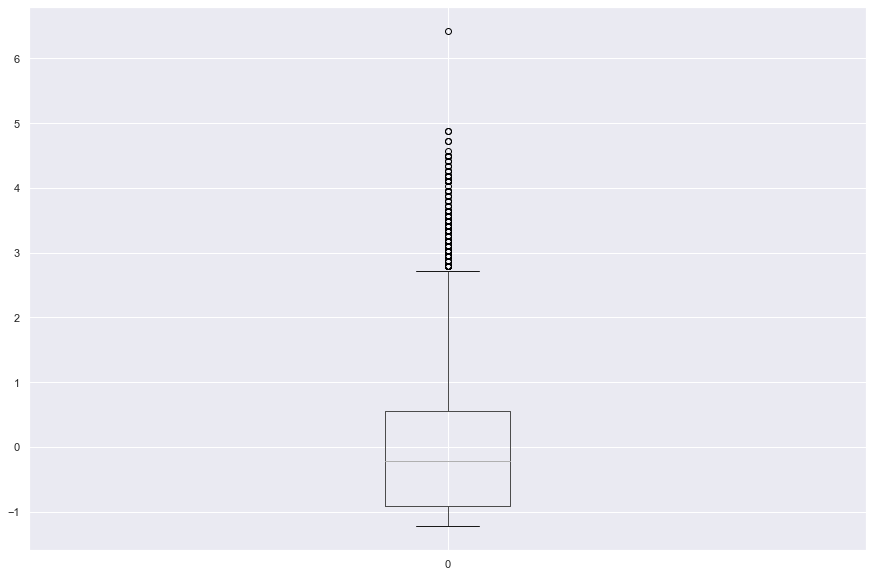

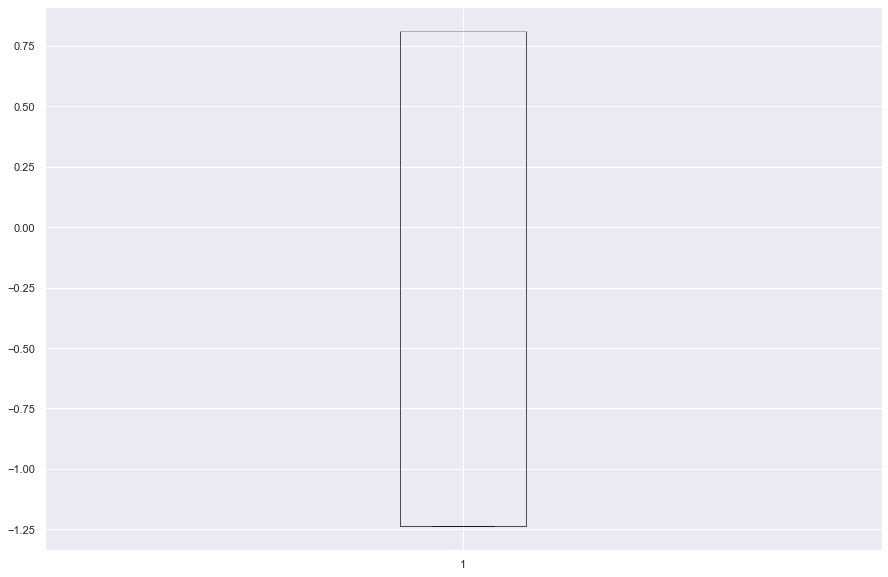

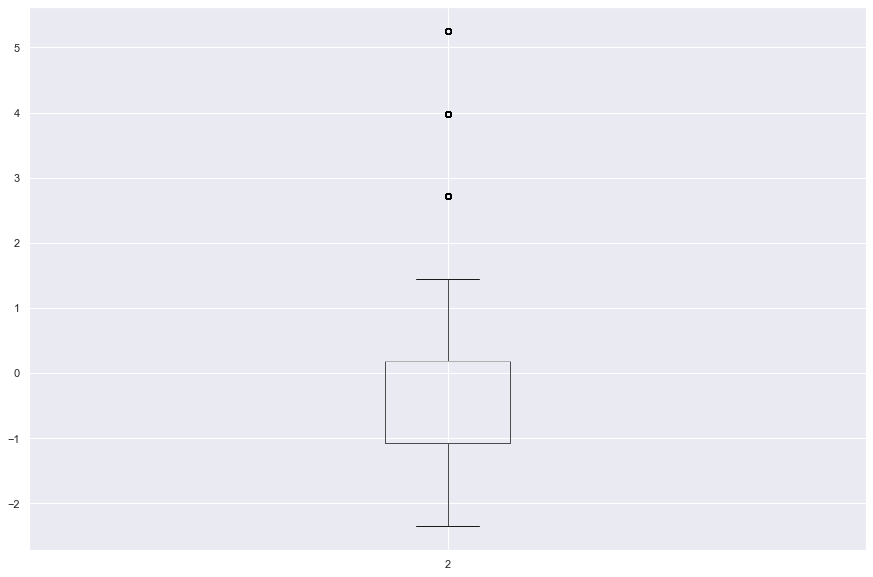

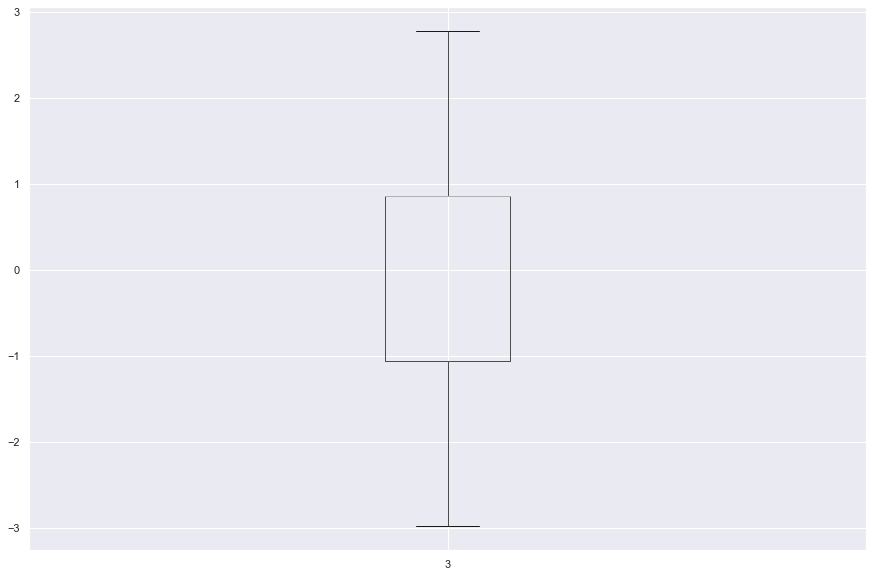

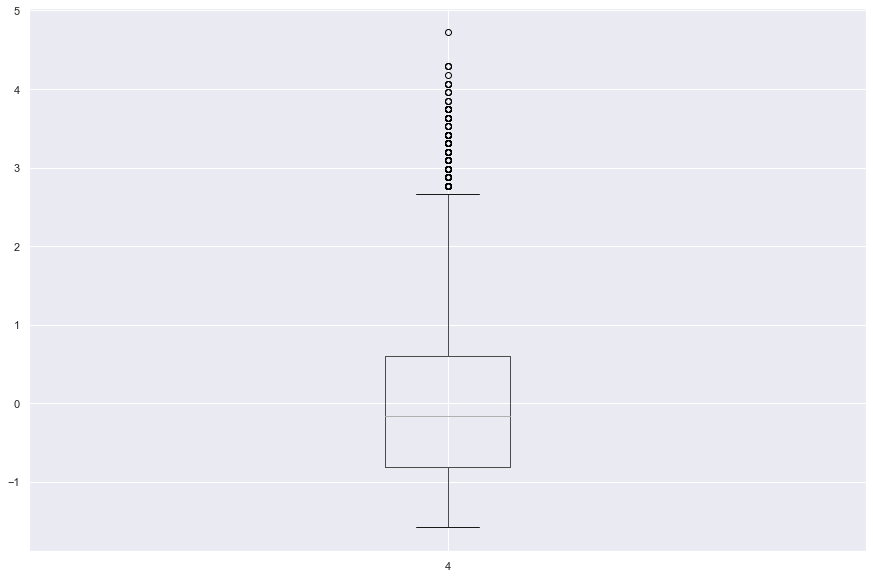

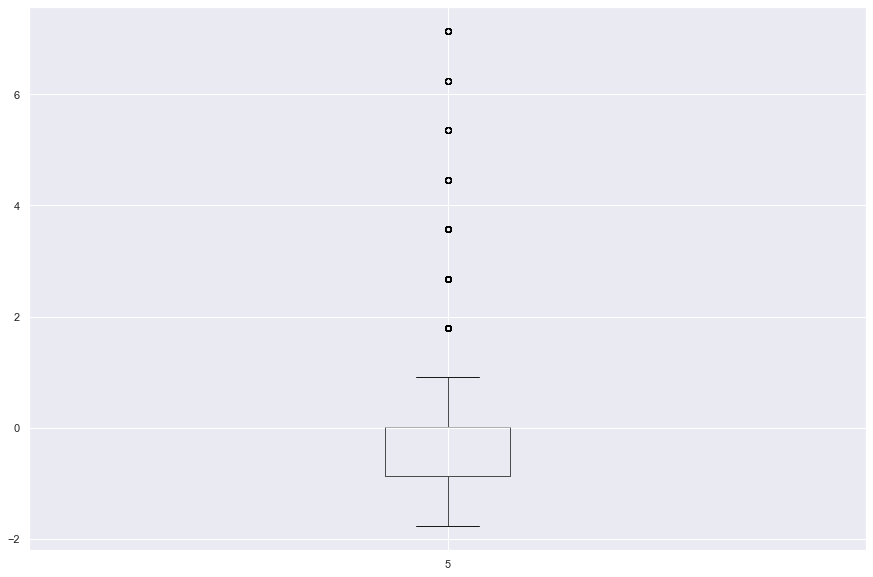

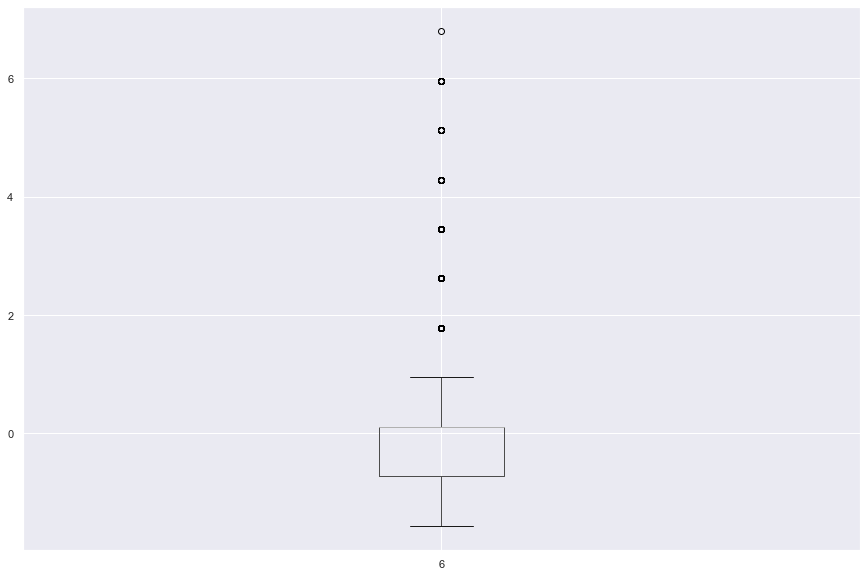

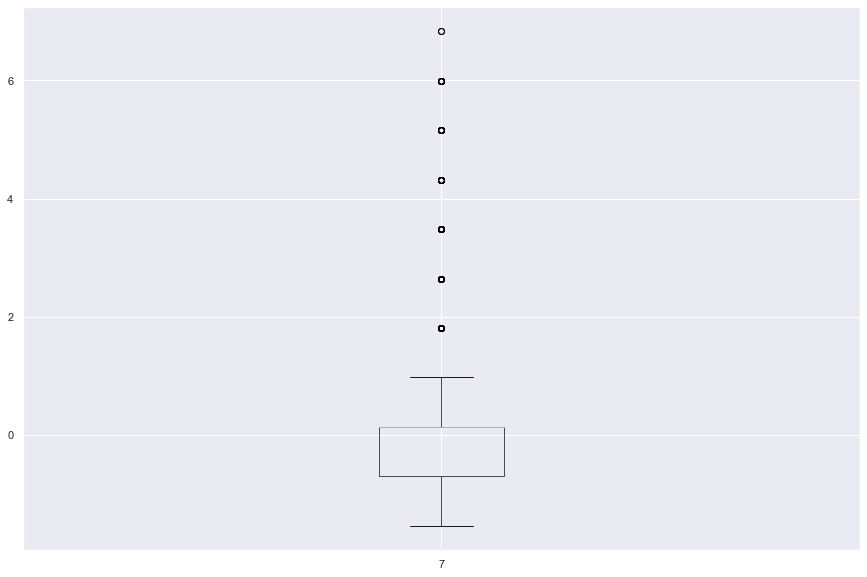

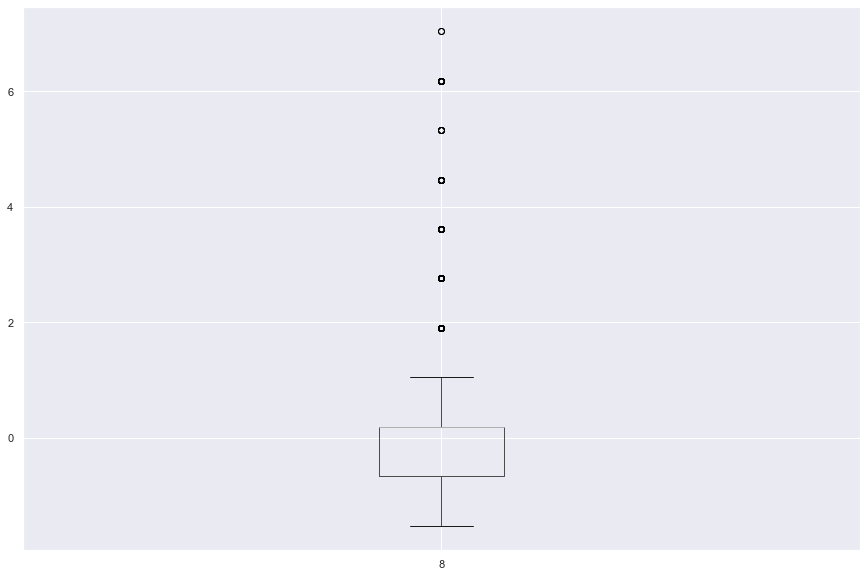

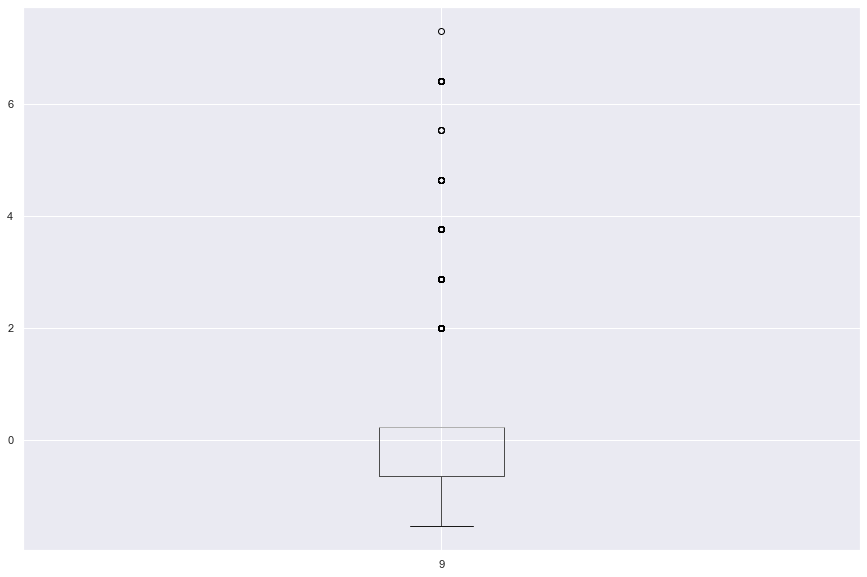

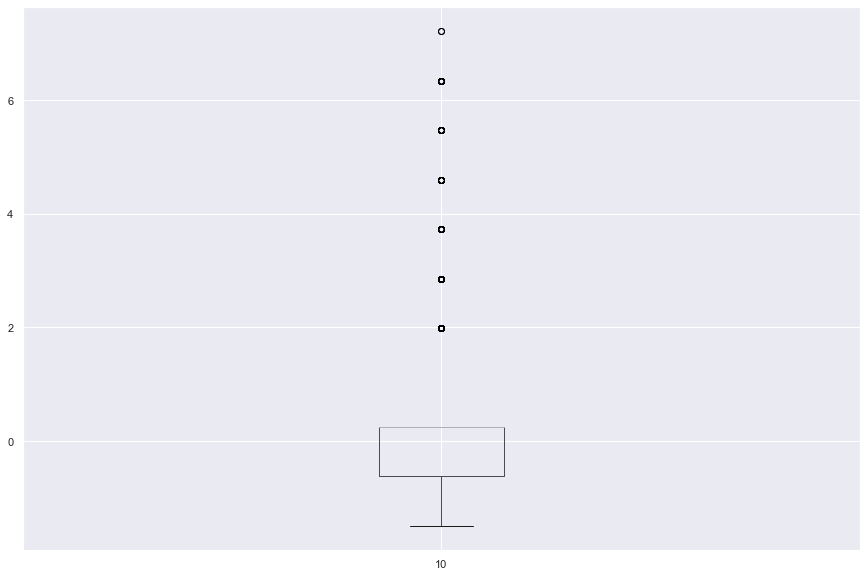

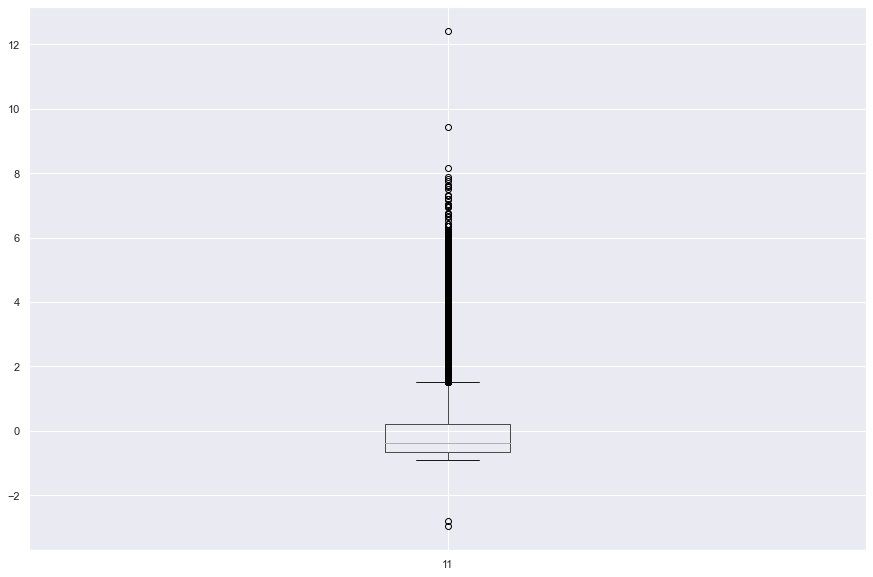

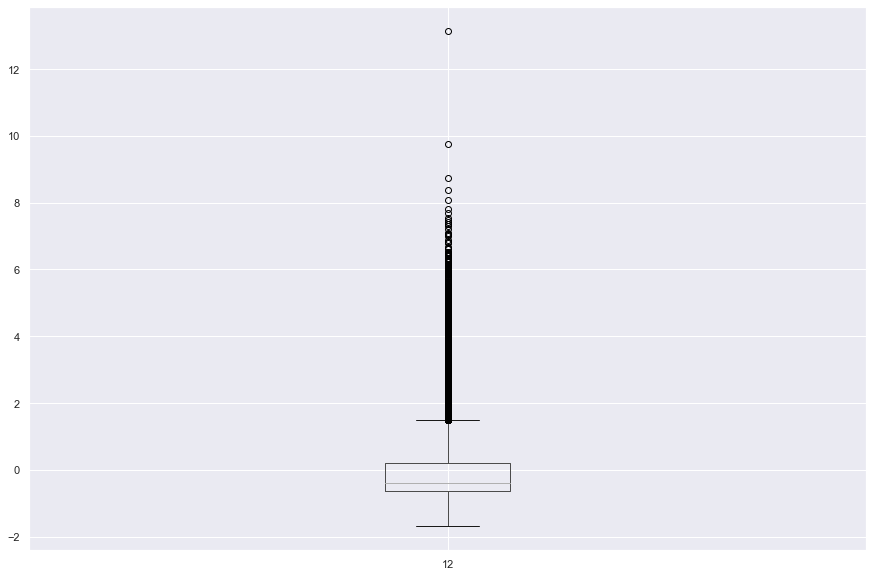

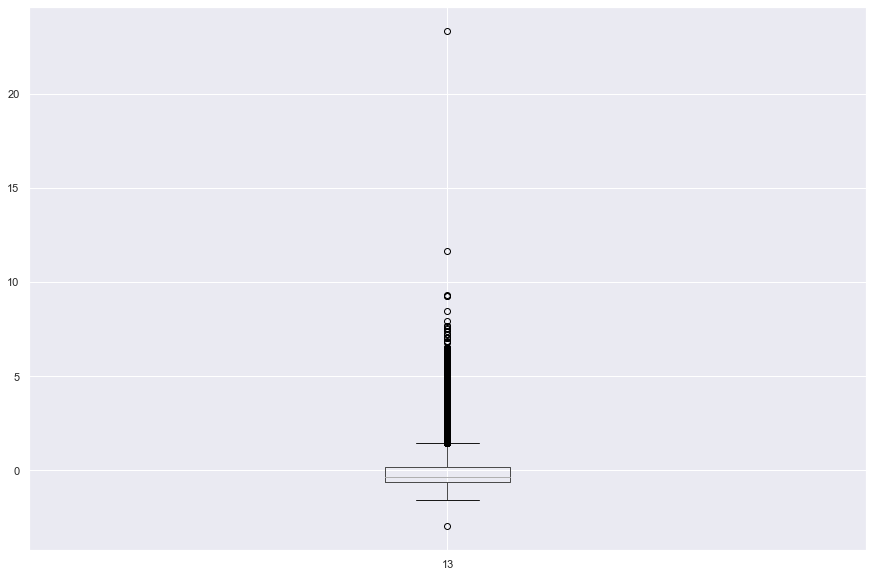

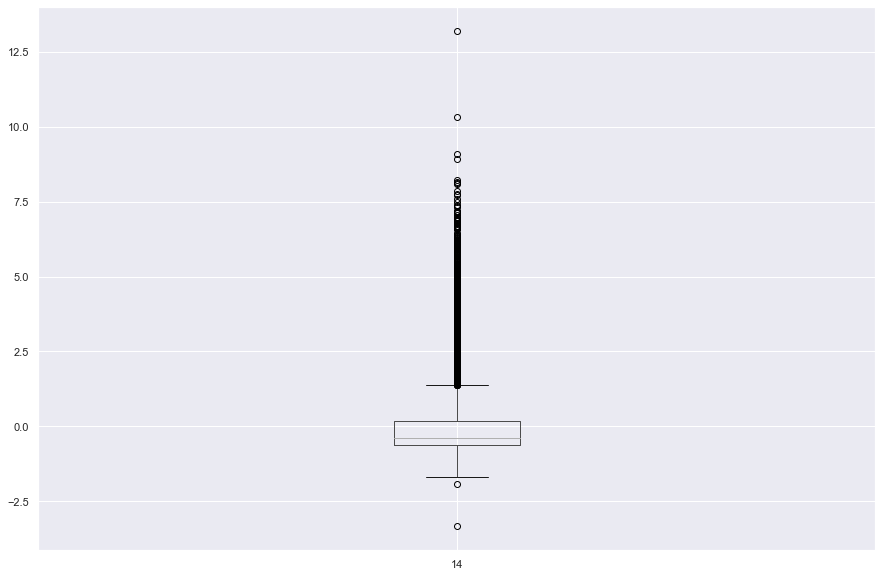

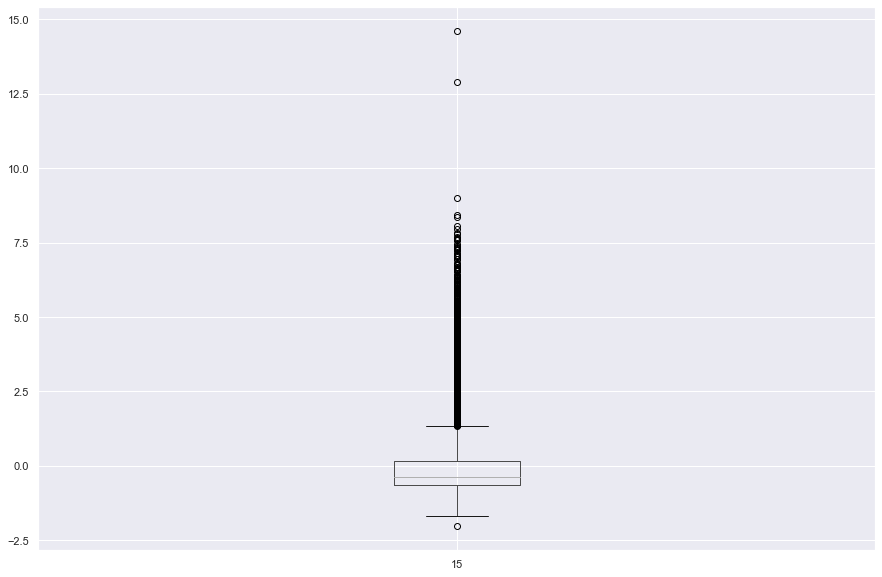

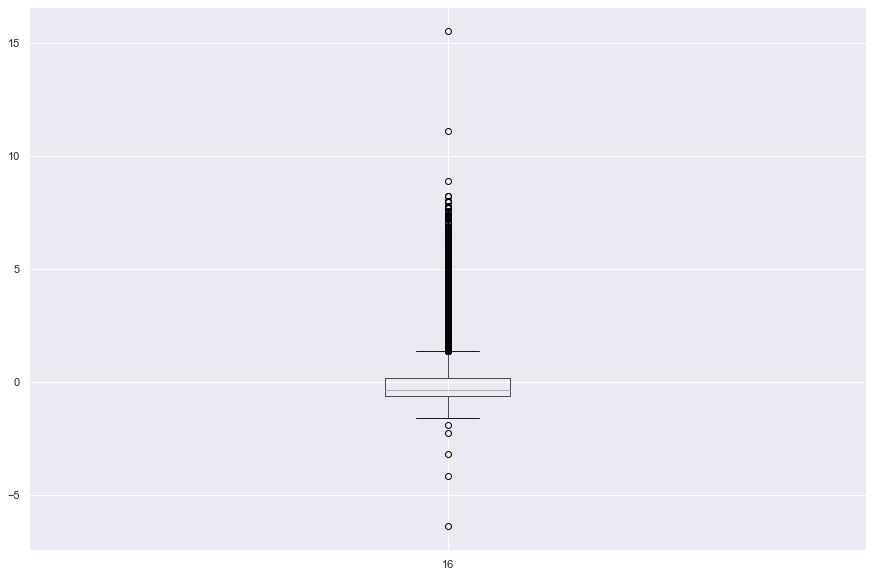

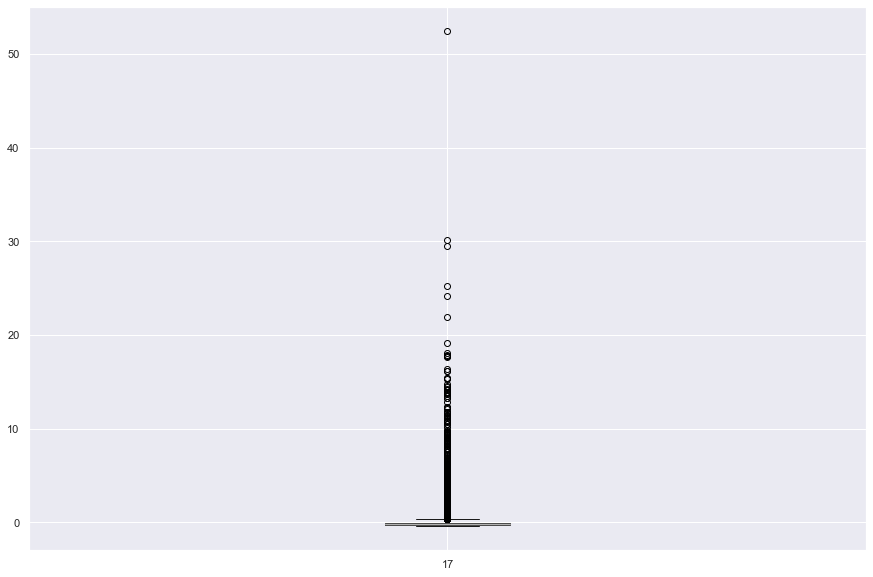

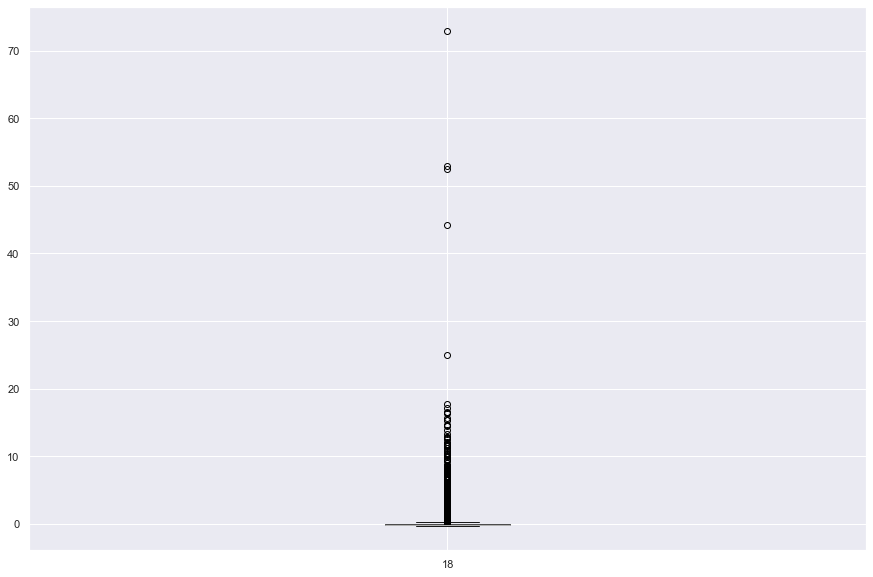

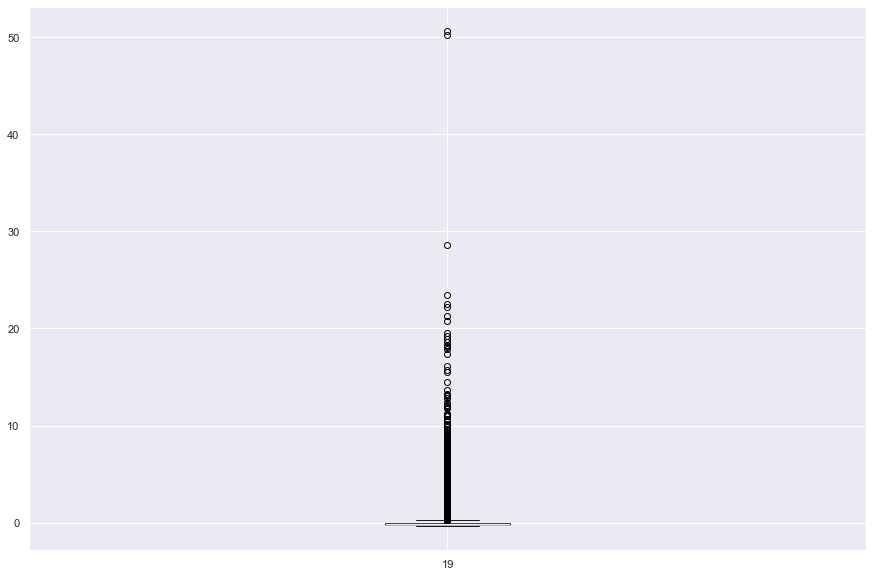

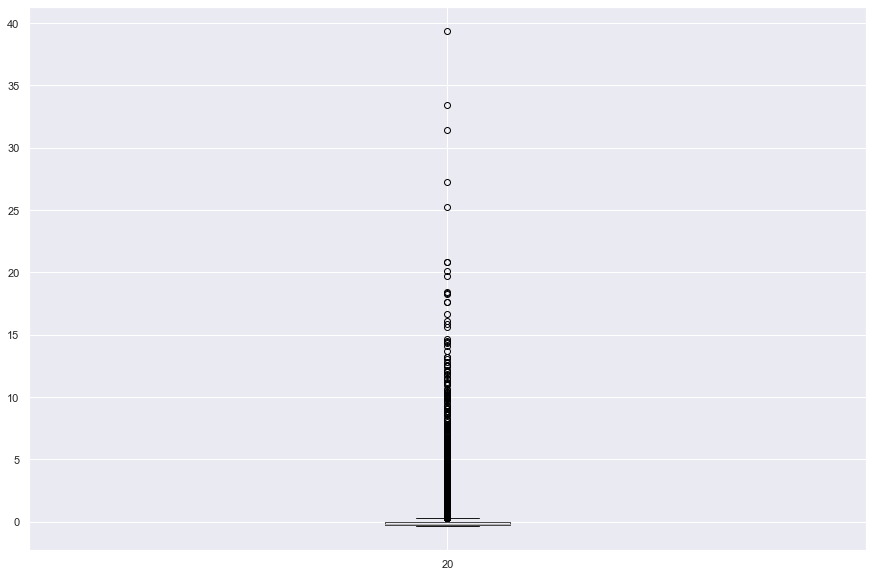

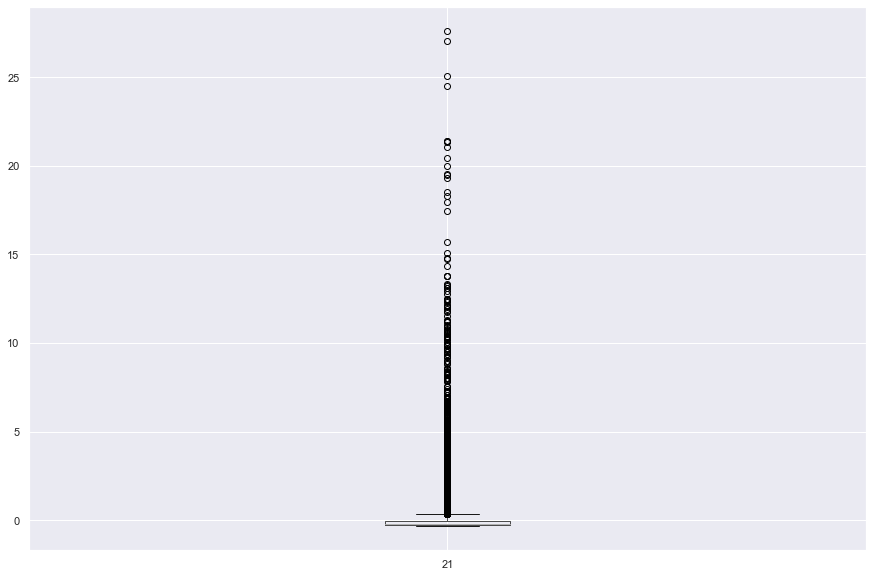

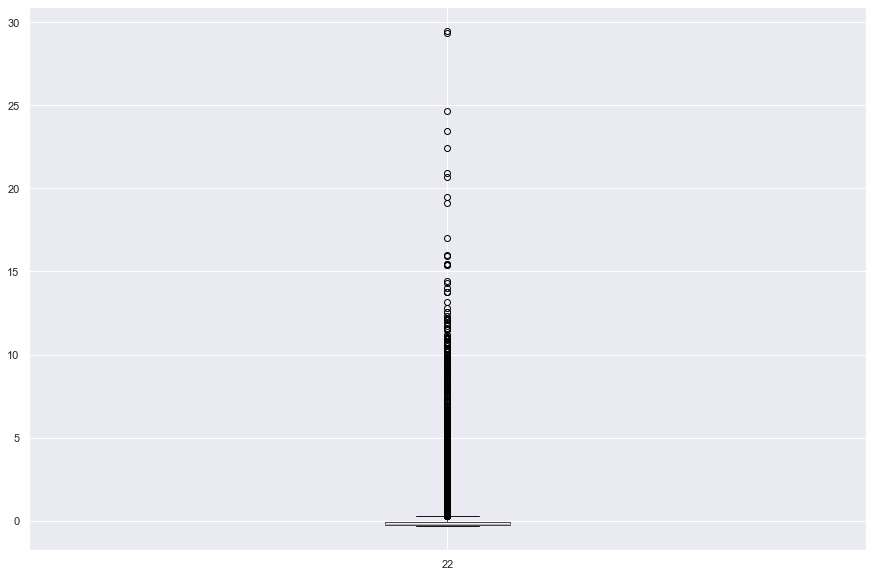

In [45]:
# Se van a identificar los datos atípicos de las variables después de la transformación
#Se identifican datos atípicos de las columnas con datos numéricos.
#La mayoría de los datos está entre -1 y 1
std_df = pd.DataFrame(X)
for col in std_df.columns:
    if col != "Y": 
        boxplot = std_df.boxplot(column = col) 
        plt.show()

DIVISIÓN ENTRE MODELOS

###Exploramos el dataset

In [6]:
#Vemos las filas y columnas que tiene
df.shape

(29991, 24)

In [7]:
#Nos centramos en dos variables para ver su comportamiento
ndf=df[["X9","X10"]]
ndf.corr()

,X9,X10
X9,1.000000,0.819933
X10,0.819933,1.000000


In [8]:
#Checamos el promedio
for col in ndf:
  print("Promedio de", col, np.round( ndf[col].mean(), 2))

Promedio de X9 -0.22
Promedio de X10 -0.27


In [9]:
#Checamos la varianza
Varience = np.cov([df.X9, df.X10])
Varience

array([[1.36671775, 1.08613715],
       [1.08613715, 1.28390876]])

In [10]:
#Checamos la suma de varianza
ndf = df[['X9','X10']]
ndf.var().sum()

2.65062650283319

In [11]:
t= ndf.var().sum()
varC =Varience[0][0]
varR = Varience[1][1]

In [12]:
print('Total Varience \t\t\t:', t.round(2) )
print('Varience prop. of Calory \t:', ((varC/t)*100).round(2),'%' )
print('Varience prop. of Rating \t:', ((varR/t)*100).round(2),'%' )

Total Varience 			: 2.65
Varience prop. of Calory 	: 51.56 %
Varience prop. of Rating 	: 48.44 %


<AxesSubplot:xlabel='X9', ylabel='X10'>

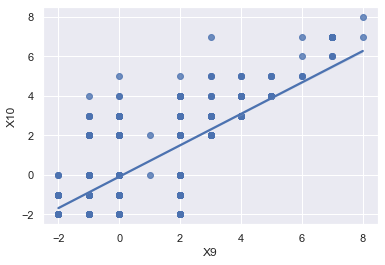

In [13]:
p = sns.regplot(data = df,  
                x = df.X9, 
                y = df.X10
               ) 
p

In [14]:
pcs = PCA(n_components=2)

pcs.fit(df[['X9', 'X10']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,1.553139,0.910064,0.910064
1,0.488249,0.089936,1.000000


In [15]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1
Standard deviation,1.55,0.49
Proportion of variance,0.91,0.09
Cumulative proportion,0.91,1.00


In [16]:
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2
Standard deviation,1.5531,0.4882
Proportion of variance,0.9101,0.0899
Cumulative proportion,0.9101,1.0000


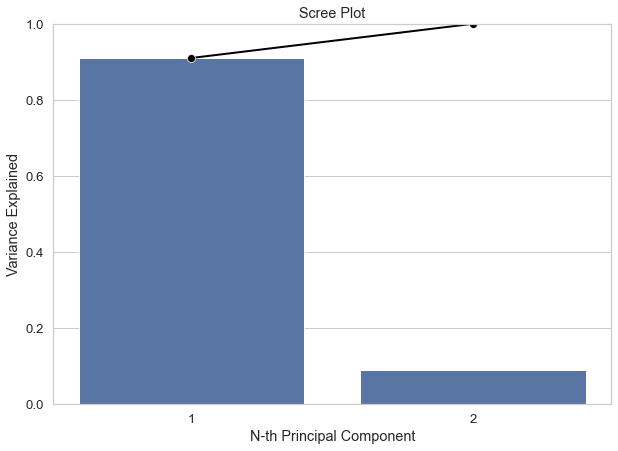

In [17]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [18]:
pcs.components_.round(4)

array([[ 0.7204,  0.6935],
       [-0.6935,  0.7204]])

In [19]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2'],
                                index=['X9', 'X10']
                                )
pcsComponents_df

,PC1,PC2
X9,0.720449,-0.693508
X10,0.693508,0.720449


In [20]:
scores = pd.DataFrame(pcs.transform(df[['X9', 'X10']]),
                      columns=['x', 'y']
                      )
scores.head()

,x,y
0,-1.763677,-0.708627
1,0.343788,0.038763
2,0.343788,0.038763
3,0.343788,0.038763
4,0.343788,0.038763


In [21]:
df.X9.var() + df.X10.var()

2.65062650283319

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29991 entries, 0 to 29990
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      29991 non-null  int64  
 1   X2      29991 non-null  float64
 2   X3      29991 non-null  float64
 3   X4      29991 non-null  float64
 4   X5      29991 non-null  float64
 5   X6      29991 non-null  float64
 6   X7      29991 non-null  float64
 7   X8      29991 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29991 non-null  float64
 10  X11     29991 non-null  float64
 11  X12     29991 non-null  float64
 12  X13     29991 non-null  float64
 13  X14     29991 non-null  float64
 14  X15     29991 non-null  float64
 15  X16     29991 non-null  float64
 16  X17     29991 non-null  float64
 17  X18     29991 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29991 non-null  float64
 20  X21     29991 non-null  float64
 21  X22     29991 non-null  float64
 22

###Trabajando los datos para implementar el PCA

<AxesSubplot:>

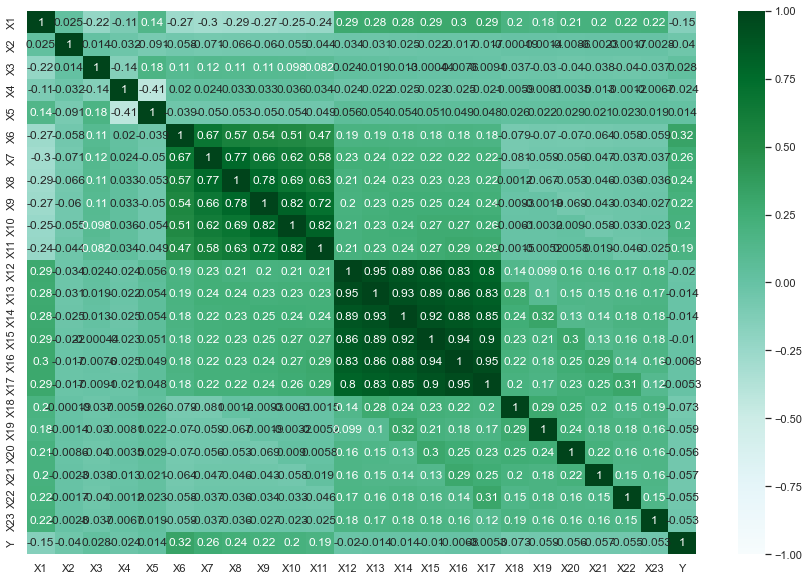

In [23]:
import seaborn as singular_values_
correlacion = df.corr()

sns.set(rc= {"figure.figsize":(15,10)})
sns.heatmap(correlacion, vmin = -1, vmax = 1, cmap = "BuGn", annot = True)

In [24]:
df=df.drop(columns=['Unnamed: 0', 'ID'])
df.corr()

KeyError: "['Unnamed: 0', 'ID'] not found in axis"

In [ ]:
pcs = PCA()
pcs.fit(df.iloc[:, 3:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [ ]:
#Los primeros cinco componentes suman un total del 95% del total de la varianza 
#OR
((pcsSummary_df.iloc[2][4])*100).round(0)
#type(pcsSummary_df)

In [ ]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

In [ ]:
pcs.components_

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.iloc[:, 3:].columns
                                )
pcsComponents_df.iloc[:,:5]

In [ ]:
pcs_final=pcsComponents_df.iloc[:,:5]

In [ ]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.iloc[:, 3:].columns
                                )
pcsComponents_dfX

###Normalización

In [ ]:
pcs_final=df.copy()
pcs_final=pd.DataFrame(pcs_final)
pcs_final.head()

In [ ]:
pcs_final=pcs_final.drop(columns=["Y"])
pcs_final

###PCA

In [ ]:
pcs = PCA()
pcs.fit(preprocessing.scale(pcs_final.iloc[:, 3:].dropna(axis=0))) 

In [ ]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

In [ ]:
pcsSummary_df.iloc[2,11]

##Paso 2
Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=pcs_final.iloc[:,:20].columns
 #                               index=pcs_final.iloc[:, 3:].columns
                                )
pcsComponents_df.iloc[:,:12]


##Paso 3
 Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

In [ ]:
pcsComponents_df.iloc[:,:12].boxplot()

#Parte 2

Responde las siguientes preguntas en una celda de texto en Jupyter Notebook.

###Preguntas

* ¿Cuál es el número de componentes mínimo y por qué?

Optampos por 12 compontentes, ya que con estos se mantiene una variación del 95%

* ¿Cuál es la variación de los datos que representan esos componentes? 


* ¿Cuál es la pérdida de información después de realizar PCA?
* De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

    - Mayor X15
    - Menor X22

* ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

In [ ]:
col = ["PC1","PC2","PC3","PC4","PC5"]
print(pcsComponents_df[col].idxmax())

In [ ]:
print(pcsComponents_df.PC1.nlargest(3))

In [ ]:
col = ["PC1","PC2","PC3","PC4","PC5"]
print(pcsComponents_df[col].idxmin())

In [ ]:
pcsComponents_df.PC5.nsmallest(3)

In [ ]:
pcsComponents_df.PC1.var() + pcsComponents_df.PC2.var()+ pcsComponents_df.PC3.var()+ pcsComponents_df.PC4.var()+ pcsComponents_df.PC5.var()+ pcsComponents_df.PC6.var()+ pcsComponents_df.PC7.var()+pcsComponents_df.PC8.var() + pcsComponents_df.PC9.var()+ pcsComponents_df.PC10.var()+ pcsComponents_df.PC11.var()+ pcsComponents_df.PC12.var()

In [ ]:
#var=[]
var=0
for col in pcsComponents_df:
  var=var+pcsComponents_df[col].var()
#  var.append(pcsComponents_df[col].var())
  

In [ ]:
var

###Ejercicio medio resuelto

In [ ]:
summary = {
    "Varianza": df.var(),
    "Mínimo": df.min(),
    "Máximo": df.max()
}
pd.DataFrame(summary).transpose()

In [ ]:
#Buscamos la varianza total de todas las variables
total_var = df.var().sum()

In [ ]:
#Calculamos la varianza para cada variable que estamos estudiando
var_x1 = df.X1.var()
var_x2 = df.X2.var()
var_x3 = df.X3.var()
var_x4 = df.X4.var()
var_x5 = df.X5.var()
var_x6 = df.X6.var()
var_x7 = df.X7.var()
var_x8 = df.X8.var()
var_x9 = df.X9.var()
var_x10 = df.X10.var()
var_x11 = df.X11.var()
var_x12 = df.X12.var()
var_x13 = df.X13.var()
var_x14 = df.X14.var()
var_x15 = df.X15.var()
var_x16 = df.X16.var()
var_x17 = df.X17.var()
var_x18 = df.X18.var()
var_x19 = df.X19.var()
var_x20 = df.X20.var()
var_x21 = df.X21.var()
var_x22 = df.X22.var()
var_x23 = df.X23.var()
var_Y = df.Y.var()

In [ ]:
#Sacamos el % que representa la varianza de cada variable respecto al total.
print('Varianza Total \t:',total_var.round(2) )
print('Varianza X1 \t:', ((var_x1/total_var)*100).round(2),'%' )
print('Varianza X2 \t:', ((var_x2/total_var)*100).round(2),'%' )
print('Varianza X3 \t:', ((var_x3/total_var)*100).round(2),'%' )
print('Varianza X4 \t:', ((var_x4/total_var)*100).round(2),'%' )
print('Varianza X5 \t:', ((var_x5/total_var)*100).round(2),'%' )
print('Varianza X6 \t:', ((var_x6/total_var)*100).round(2),'%' )
print('Varianza X7 \t:', ((var_x7/total_var)*100).round(2),'%' )
print('Varianza X8 \t:', ((var_x8/total_var)*100).round(2),'%' )
print('Varianza X9 \t:', ((var_x9/total_var)*100).round(2),'%' )
print('Varianza X10 \t:',((var_x10/total_var)*100).round(2),'%' )
print('Varianza X11 \t:', ((var_x11/total_var)*100).round(2),'%' )
print('Varianza X12 \t:', ((var_x12/total_var)*100).round(2),'%' )
print('Varianza X13 \t:', ((var_x13/total_var)*100).round(2),'%' )
print('Varianza X14 \t:', ((var_x14/total_var)*100).round(2),'%' )
print('Varianza X15 \t:', ((var_x15/total_var)*100).round(2),'%' )
print('Varianza X16 \t:', ((var_x16/total_var)*100).round(2),'%' )
print('Varianza X17 \t:', ((var_x17/total_var)*100).round(2),'%' )
print('Varianza X18 \t:', ((var_x18/total_var)*100).round(2),'%' )
print('Varianza X19 \t:', ((var_x19/total_var)*100).round(2),'%' )
print('Varianza X20 \t:',((var_x20/total_var)*100).round(2),'%' )
print('Varianza X21 \t:', ((var_x21/total_var)*100).round(2),'%' )
print('Varianza X22 \t:', ((var_x22/total_var)*100).round(2),'%' )
print('Varianza X23 \t:', ((var_x23/total_var)*100).round(2),'%' )
print('Varianza Y \t:', ((var_Y/total_var)*100).round(2),'%' )

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
#Son muchos valores. Así que imprimamos los primeros 5 resultados mejor.
scaled[:5]

In [ ]:
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

In [ ]:
summary = {
"Varianzas": scaled_df.var(),
"Valor Min": scaled_df.min(),
"Valor Max": scaled_df.max()
}
#recuerda que la variable cols la definimos más arriba.
pd.DataFrame(summary).transpose()


In [ ]:
from sklearn.decomposition import PCA
pcs = PCA()

#Nota: Recuerda limpiar los valores vacíos de tu conjunto de datos antes de␣ aplicar este paso. De lo contrario, te va a dar un error.
pcs_t = pcs.fit_transform(scaled_df)
#De nuevo, con muchos valores, así que vamos a imprimir los primeros 5 renglones
pcs_t[:5]


In [ ]:
pcsSummary_df = pd.DataFrame({
    '% varianza explicada': np.round(pcs.explained_variance_ratio_,4) * 100,
    '% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100
})
pcsSummary_df

In [ ]:
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df

In [ ]:
pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)
print("Varianza total variables originales: ", scaled_df.var().sum())
print("Varianza total de los componentes  : ", pcs_df.var().sum())

###Actividad en clase

In [ ]:
pcsSummary_df.head(16)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
c = "https://raw.githubusercontent.com/tec03/Datasets/main/datasets/Cartwheeldata.csv"

In [ ]:
df = pd.read_csv(c, index_col = 0)
df.index.name = None
df.head()

In [ ]:
varX = df.Score.to_list()
varX

In [ ]:
#Min max normalización
def normalizacion(x):
  min = np.min(x)
  max = np.max(x)
  rango = max-min
  return [(a-min)/rango for a in x]

In [ ]:
normalizacion(varX)